<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Intro" data-toc-modified-id="Intro-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Intro</a></span></li><li><span><a href="#1D-Automata" data-toc-modified-id="1D-Automata-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>1D Automata</a></span><ul class="toc-item"><li><span><a href="#Animation" data-toc-modified-id="Animation-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Animation</a></span></li></ul></li><li><span><a href="#Conway’s-Game-Of-Life" data-toc-modified-id="Conway’s-Game-Of-Life-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Conway’s Game Of Life</a></span><ul class="toc-item"><li><span><a href="#Animation-in-Matplotlib" data-toc-modified-id="Animation-in-Matplotlib-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Animation in Matplotlib</a></span><ul class="toc-item"><li><span><a href="#Interactive-Animation" data-toc-modified-id="Interactive-Animation-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Interactive Animation</a></span></li></ul></li><li><span><a href="#Game-of-Life-3D" data-toc-modified-id="Game-of-Life-3D-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Game of Life 3D</a></span></li></ul></li></ul></div>

# Intro
Cellular Automata are discrete mathematical models of Artificial Life.
*Discrete* because they exist in a discrete space, for example a 2D cell grid for 2-Dimensional automata.

Other primary properties of a cellular automaton:
* **dimensionality** of the space/world it lives in
* **evolutionary rules**
* **neighborhood**. For example in a 2D setting *Moore Neighboorhood* consists of the 8 surrounding cells.
* finite number of **states**

Also in general updates are applied instantly to all units.

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from PIL import Image, ImageDraw

%matplotlib notebook

# 1D Automata

In [92]:
class Automaton_1D:
    def __init__(self, n: int, states: int=2):
        """
        1D Automaton
        :param n: number of cells
        """
        self.n = n
        self.space = np.zeros(n, dtype=np.uint8)
        self.space[n//2] = 1
        #np.array([0,0,0,0,1,0,0,0,0,0])#np.random.choice(2, n)
    
    def update(self, rule: dict):
        """
        Update automaton state
        """
        tmp_space = self.space.copy()
        for i in range(self.n):
            neighbours = self.get_neighbours(i)
            tmp_space[i] = rule["".join([str(s) for s in neighbours])]
        self.space = tmp_space
        
    def get_neighbours(self, i: int):
        if i == 0:
            return np.insert(self.space[:2], 0, self.space[-1])
        elif i == self.n - 1:
            return np.insert(self.space[-2:], 2, self.space[0])
        else: 
            return self.space[max(0, i-1):i+2]

In [129]:
rule_0 = {'111': 1, '110': 1, '101': 1, '100': 1, '011': 1, '010': 1, '001': 1, '000': 0}
rule_sierpinski = {'111': 0, '110': 1, '101': 0, '100': 1, '011': 1, '010': 0, '001': 1, '000': 0}
rule_x = {'111': 0, '110': 0, '101': 0, '100': 1, '011': 1, '010': 1, '001': 1, '000': 0}

## Animation

<IPython.core.display.Javascript object>


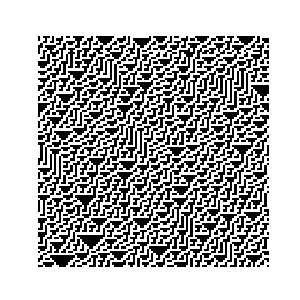

In [130]:
automaton_size = 100
automaton_1d = Automaton_1D(automaton_size)
nb_frames = 100

img = Image.new('RGB', (automaton_size, nb_frames), 'white')
draw = ImageDraw.Draw(img)
fig, ax = plt.subplots(dpi=50, figsize=(5, 5))
#im = ax.imshow(img)
plt.axis('off')

def animate(i, automaton, draw, img):
    space_img = Image.fromarray(automaton_1d.space.reshape(1, automaton_size)*255)
    img.paste(space_img, (0, i)) #mask=space_img
    ax.imshow(img)
    automaton.update(rule_x)

ani = animation.FuncAnimation(fig, animate, frames=nb_frames, interval=1, 
                              fargs=[automaton_1d, draw, img])

# Conway’s Game Of Life

Game Of Life (GOL) is possibly one of the most notorious examples of a cellular automata.

Defined by mathematician John Horton Conway, it plays out on a two dimensional grid for which each cell can be in one of two possible states. Starting from an initial grid configuration the system evolves at each unit step taking into account only the immediate preceding configuration. If for each cell we consider the eight surrounding cells as neighbors, the system transition can be defined by four simple rules.

In [2]:
class ConwayGOL_2D:
    def __init__(self, N):
        """
        2D Conway Game of Life
        :param N: grid side size (resulting grid will be a NxN matrix)
        """
        self.N = N
        self.grid = np.random.choice(2, (N,N))
    
    def update(self):
        """
        Update status of the grid
        """
        tmpGrid = self.grid.copy()
        for i in range(self.N):
            for j in range(self.N):
                neighbours = self.grid[max(0, i-1):min(i+2,self.N), max(0, j-1):min(j+2,self.N)].sum()
                neighbours -= self.grid[i, j]
                if self.grid[i, j] == 1:
                    if neighbours > 3 or neighbours < 2:
                        tmpGrid[i, j] = 0
                elif neighbours == 3:
                    tmpGrid[i, j] = 1
        self.grid = tmpGrid

## Animation in Matplotlib

<IPython.core.display.Javascript object>


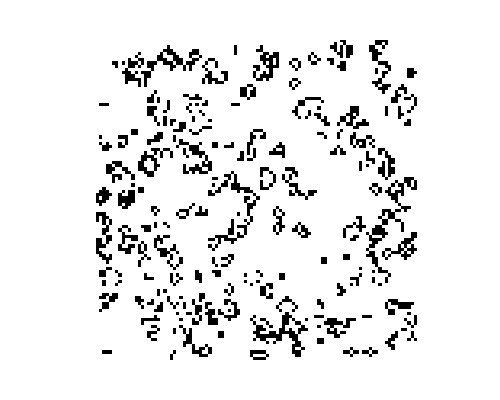

In [3]:
gol = ConwayGOL_2D(100)

fig, ax = plt.subplots(dpi=100, figsize=(5, 4))
im = ax.imshow(gol.grid, cmap='Greys', interpolation='nearest')
plt.axis('off')

def animate(i):
    gol.update()
    im.set_data(gol.grid)

#ani = animation.FuncAnimation(fig, animate, frames=1000, interval=100).save('basic_animation.mp4', writer=animation.FFMpegFileWriter(fps=30))
animation.FuncAnimation(fig, animate, frames=1000, interval=100)
#plt.show()

### Interactive Animation


In [4]:
from ipywidgets import interact, widgets

In [5]:
def run_conwayGOL_2D(size):
    gol = ConwayGOL_2D(size)

    fig, ax = plt.subplots(dpi=100, figsize=(5, 4))
    im = ax.imshow(gol.grid, cmap='Greys', interpolation='nearest')
    plt.axis('off')

    def animate(i):
        gol.update()
        im.set_data(gol.grid)

    return animation.FuncAnimation(fig, animate, frames=1000, interval=100)

<IPython.core.display.Javascript object>


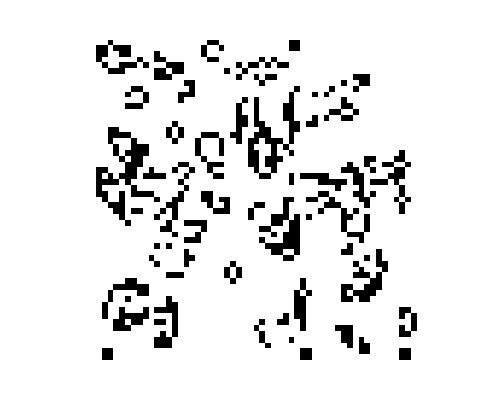

<function __main__.run_conwayGOL_2D>

In [6]:
from ipywidgets import interact, widgets
interact(run_conwayGOL_2D, size=(10,100))

## Game of Life 3D

Regarding the grid structure and neighbors counting is purely a matter of using a 3-dimensional numpy array and related indexing.
For the rules, original GOL ones are not so stable for a 3D setup.

In [ ]:
class ConwayGOL_3D:
    def __init__(self, N):
        """
        3D Conway Game of Life
        :param N: 3D grid side size (resulting grid will be a NxNxN matrix)
        """
        self.N = N
        self.grid = np.random.choice(2, (N,N,N))
    
    def update(self):
        """
        Update status of the grid
        """
        tmpGrid = self.grid.copy()
        for z in range(self.N):
            for y in range(self.N):
                for x in range(self.N):
                    neighbours = self.grid[max(0, z-1):min(z+2,self.N),
                                           max(0, y-1):min(y+2,self.N), 
                                           max(0, x-1):min(x+2,self.N)].sum()
                    neighbours -= self.grid[z, y, x]
                    if self.grid[z, y, x] == 1:
                        if neighbours > 3 or neighbours < 2:
                            tmpGrid[z, y, x] = 0
                    elif neighbours == 3:
                        tmpGrid[z, y, x] = 1
        self.grid = tmpGrid